# DONE
1. Общие трудозатраты на проект в часах;
2. Среднее время, затраченное на решение задач в часах;
3. Медианное время, затраченное на решение задач в часах;
4. Среднее время, затраченное на решение задач каждым из исполнителей в часах;
5. Рассчитать рентабельность проекта по формуле рентабельность = (прибыль*100)/доход.
Расчёт прибыли производить, как прибыль = доход – расходы;
6. Рассчитать среднее количество часов, отрабатываемое каждым сотрудником за день;
7. Вычислить дни отсутствия для каждого сотрудника, с учетом того, что все исполнители
обязаны были работать каждый будний день;
8. Рассчитать средний «вылет» специалиста из оценки в процентах.
9. Дополнительно необходимо сформировать сводный график по проекту с указанием
оценки (в часах) и фактических трудозатрат (в часах) по каждой из задач проекта в виде
отдельного файла png.

# Расписание входов
1. 21:18 04.08 - 0:41 05.08 - (перерыв примерно час)
2. 17:10 05.08 - 18:47 05.08 (перерыв полчаса)
3. 10:31 05.08 - 01.10 06.08 (перерыв час)
4. 04:13 06.08 - 06:30 06.08 (перерыв полчаса)

# Import

In [217]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# Обработка данных

In [218]:
path_a = '/content/drive/MyDrive/Тестовое для РИТ/Приложение А'
data_a = pd.read_table(path_a)
data_a['Дата'] = pd.to_datetime(data_a['Дата'], infer_datetime_format=True, format = "%Y-%m-%d", errors='coerce')
data_a

,Дата,Исполнитель,Задача,Часы
0,2021-03-05,Вася,LOC-1,8
1,2021-03-05,Петя,LOC-2,8
2,2021-03-05,Маша,LOC-3,2
3,2021-03-05,Маша,LOC-4,4
4,2021-03-05,Маша,LOC-5,2
5,2021-04-05,Маша,LOC-5,2
6,2021-04-05,Маша,LOC-7,6
7,2021-04-05,Вася,LOC-8,4
8,2021-04-05,Петя,LOC-9,2
9,2021-04-05,Вася,LOC-10,4


In [219]:
path_b = '/content/drive/MyDrive/Тестовое для РИТ/Приложение B'
data_b = pd.read_table(path_b)
data_b

,Задача,Оценка
0,LOC-1,6
1,LOC-2,4
2,LOC-3,2
3,LOC-4,4
4,LOC-5,4
5,LOC-6,12
6,LOC-7,6
7,LOC-8,4
8,LOC-9,2
9,LOC-10,3


In [220]:
path_c = '/content/drive/MyDrive/Тестовое для РИТ/Приложение C'
data_c = pd.read_table(path_c)
data_c

,Исполнитель,Ставка
0,Вася,50
1,Маша,75
2,Петя,35


# Анализ

## Общие трудозатраты на проект в часах

In [221]:
data_a['Задача'].unique()

array(['LOC-1', 'LOC-2', 'LOC-3', 'LOC-4', 'LOC-5', 'LOC-7', 'LOC-8',
       'LOC-9', 'LOC-10', 'LOC-11', 'LOC-12', 'LOC-13', 'LOC-14',
       'LOC-17', 'LOC-6', 'LOC-16', 'LOC-15', 'LOC-18', 'LOC-19',
       'LOC-20', 'LOC-21', 'LOC-22', 'LOC-23', 'LOC-24', 'LOC-25',
       'LOC-26', 'LOC-27', 'LOC-28', 'LOC-29', 'LOC-30', 'LOC-31',
       'LOC-32', 'LOC-33', 'LOC-34', 'LOC-35', 'LOC-36', 'LOC-37'],
      dtype=object)

In [222]:
hourcost = pd.DataFrame(data={'Задача': [], 'Часы': []})
for project in data_a['Задача'].unique():
  task = data_a[data_a['Задача'] == project]['Задача']
  hours = data_a[data_a['Задача'] == project]['Часы'].sum()
  hourcost = hourcost.append({'Задача': task.values[0], 'Часы': hours}, ignore_index=True)
hourcost

,Задача,Часы
0,LOC-1,8.0
1,LOC-2,8.0
2,LOC-3,2.0
3,LOC-4,4.0
4,LOC-5,4.0
5,LOC-7,6.0
6,LOC-8,4.0
7,LOC-9,2.0
8,LOC-10,4.0
9,LOC-11,6.0


In [223]:
hourcost['Часы'].describe()

count    37.000000
mean      6.189189
std       3.770042
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      16.000000
Name: Часы, dtype: float64

In [224]:
mean_hour = hourcost['Часы'].mean()
mean_hour

6.1891891891891895

In [225]:
median_hour = hourcost['Часы'].median()
median_hour

6.0

In [226]:
def getNum(value):
  return [int(s) for s in value.split('-') if s.isdigit()][0]

11518

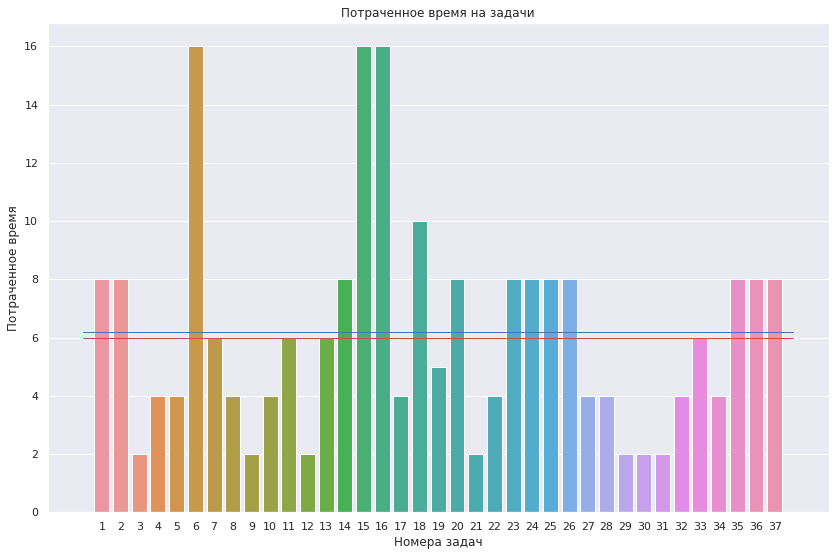

In [227]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

timecost = hourcost.copy()
timecost['Задача'] = timecost['Задача'].apply(getNum)
g = sns.barplot(x="Задача", y='Часы', data=timecost).set(title = 'Потраченное время на задачи',xlabel='Номера задач', ylabel='Потраченное время')
plt.plot([-1, 37], [mean_hour, mean_hour], linewidth=1)
plt.plot([-1, 37], [median_hour, median_hour], linewidth=1, color='r')

del timecost
gc.collect()

## Среднее время, затраченное на решение задач каждым из исполнителей в часах

In [228]:
data_a['Исполнитель'].unique()

array(['Вася', 'Петя', 'Маша'], dtype=object)

In [229]:
hourcost_by_man = pd.DataFrame(data={'Исполнитель': [], 'Часы': []})
for project in data_a['Исполнитель'].unique():
  task = data_a[data_a['Исполнитель'] == project]['Исполнитель']
  hours = data_a[data_a['Исполнитель'] == project]['Часы'].sum()
  hourcost_by_man = hourcost_by_man.append({'Исполнитель': task.values[0], 'Часы': hours}, ignore_index=True)
hourcost_by_man

,Исполнитель,Часы
0,Вася,84.0
1,Петя,81.0
2,Маша,64.0


In [230]:
hourcost_by_man.describe()

,Часы
count,3.000000
mean,76.333333
std,10.785793
min,64.000000
25%,72.500000
50%,81.000000
75%,82.500000
max,84.000000


In [231]:
mean_hour = hourcost_by_man['Часы'].mean()
mean_hour

76.33333333333333

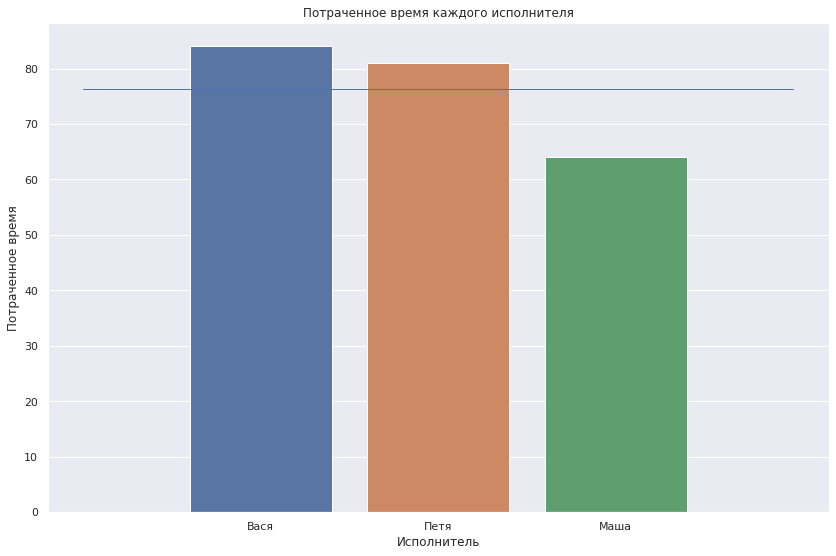

In [232]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Исполнитель", y='Часы', data=hourcost_by_man).set(title = 'Потраченное время каждого исполнителя',ylabel='Потраченное время')
plt.plot([-1, 3], [mean_hour, mean_hour], linewidth=1)

In [233]:
hourcost_by_man = hourcost_by_man.merge(data_c, on=['Исполнитель', 'Исполнитель'], how='left')
hourcost_by_man['Зарплата'] = hourcost_by_man['Часы'] * hourcost_by_man['Ставка']
hourcost_by_man

,Исполнитель,Часы,Ставка,Зарплата
0,Вася,84.0,50,4200.0
1,Петя,81.0,35,2835.0
2,Маша,64.0,75,4800.0


## Рентабельность

In [234]:
data_a = data_a.merge(hourcost_by_man.filter(['Исполнитель', 'Ставка'],axis=1), on=['Исполнитель', 'Исполнитель'], how='left')

In [235]:
data_a['Расход'] = data_a['Часы']*data_a['Ставка']

In [236]:
data_a = data_a.drop(['Ставка'], axis=1)

In [237]:
data_a

,Дата,Исполнитель,Задача,Часы,Расход
0,2021-03-05,Вася,LOC-1,8,400
1,2021-03-05,Петя,LOC-2,8,280
2,2021-03-05,Маша,LOC-3,2,150
3,2021-03-05,Маша,LOC-4,4,300
4,2021-03-05,Маша,LOC-5,2,150
5,2021-04-05,Маша,LOC-5,2,150
6,2021-04-05,Маша,LOC-7,6,450
7,2021-04-05,Вася,LOC-8,4,200
8,2021-04-05,Петя,LOC-9,2,70
9,2021-04-05,Вася,LOC-10,4,200


In [238]:
projects = pd.DataFrame(data={'Задача': [], 'Расход': []})
for project in data_a['Задача'].unique():
  task = data_a[data_a['Задача'] == project]['Задача']
  cost = data_a[data_a['Задача'] == project]['Расход'].sum()
  projects = projects.append({'Задача': task.values[0], 'Расход': cost}, ignore_index=True)
projects

,Задача,Расход
0,LOC-1,400.0
1,LOC-2,280.0
2,LOC-3,150.0
3,LOC-4,300.0
4,LOC-5,300.0
5,LOC-7,450.0
6,LOC-8,200.0
7,LOC-9,70.0
8,LOC-10,200.0
9,LOC-11,210.0


In [239]:
projects['Прибыль'] = 24000 - projects['Расход']
projects['Рентабельность'] = (projects['Прибыль']*100)/24000
projects = projects.merge(hourcost.filter(['Задача', 'Часы'],axis=1), on=['Задача', 'Задача'], how='left')
del hourcost
gc.collect()
projects

,Задача,Расход,Прибыль,Рентабельность,Часы
0,LOC-1,400.0,23600.0,98.333333,8.0
1,LOC-2,280.0,23720.0,98.833333,8.0
2,LOC-3,150.0,23850.0,99.375000,2.0
3,LOC-4,300.0,23700.0,98.750000,4.0
4,LOC-5,300.0,23700.0,98.750000,4.0
5,LOC-7,450.0,23550.0,98.125000,6.0
6,LOC-8,200.0,23800.0,99.166667,4.0
7,LOC-9,70.0,23930.0,99.708333,2.0
8,LOC-10,200.0,23800.0,99.166667,4.0
9,LOC-11,210.0,23790.0,99.125000,6.0


95

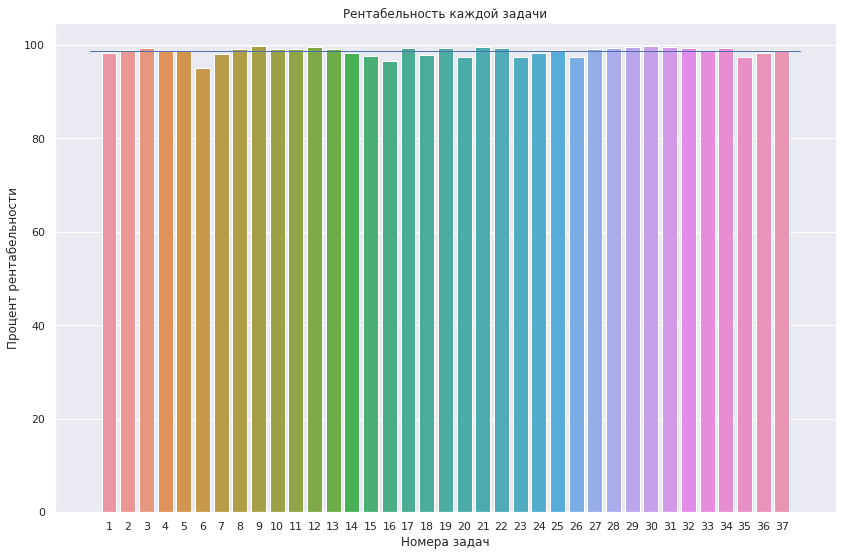

In [240]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

mean_profitability = projects['Рентабельность'].mean()
profitability = projects.copy()
profitability['Задача'] = profitability['Задача'].apply(getNum)
g = sns.barplot(x="Задача", y='Рентабельность', data=profitability).set(title = 'Рентабельность каждой задачи',xlabel='Номера задач', ylabel='Процент рентабельности')
plt.plot([-1, 37], [mean_profitability, mean_profitability], linewidth=1)

del profitability
gc.collect()

In [241]:
print("Рентабельность проекта =", mean_profitability)

Рентабельность проекта = 98.66722972972974


## Рассчитать среднее количество часов, отрабатываемое каждым сотрудником за день

In [242]:
def getDayofWeek(date):
  return date.dayofweek
  
dates = data_a.drop(['Задача', 'Расход'], axis=1)
dates = dates.sort_values('Дата')

hours_list = []
for worker, date in zip(dates['Исполнитель'], dates['Дата']):
  hours = dates[(dates['Исполнитель'] == worker) & (dates['Дата'] == date)]['Часы']
  hours_list.append(hours.sum())
dates['Часы'] = hours_list

del hours_list
gc.collect()

dates = dates.drop_duplicates()
dates = dates.reset_index(drop=True)
dates['День недели'] = dates['Дата'].apply(getDayofWeek)
dates

,Дата,Исполнитель,Часы,День недели
0,2021-03-05,Вася,8,4
1,2021-03-05,Петя,8,4
2,2021-03-05,Маша,8,4
3,2021-04-05,Маша,8,0
4,2021-04-05,Вася,10,0
5,2021-04-05,Петя,8,0
6,2021-05-05,Петя,8,2
7,2021-05-05,Вася,8,2
8,2021-05-13,Петя,8,3
9,2021-05-13,Вася,8,3


In [243]:
average_worker_time_list = []
for worker in hourcost_by_man['Исполнитель']:
  average_worker_time = dates[dates['Исполнитель'] == worker]['Часы'].sum()/len(dates[dates['Исполнитель'] == worker]['Часы'])
  average_worker_time_list.append(average_worker_time)
hourcost_by_man['Среднее рабочее время'] = average_worker_time_list

del average_worker_time_list
gc.collect()

hourcost_by_man

,Исполнитель,Часы,Ставка,Зарплата,Среднее рабочее время
0,Вася,84.0,50,4200.0,8.400000
1,Петя,81.0,35,2835.0,7.363636
2,Маша,64.0,75,4800.0,8.000000


In [244]:
mean_average_hour = hourcost_by_man['Среднее рабочее время'].mean()
mean_average_hour

7.921212121212122

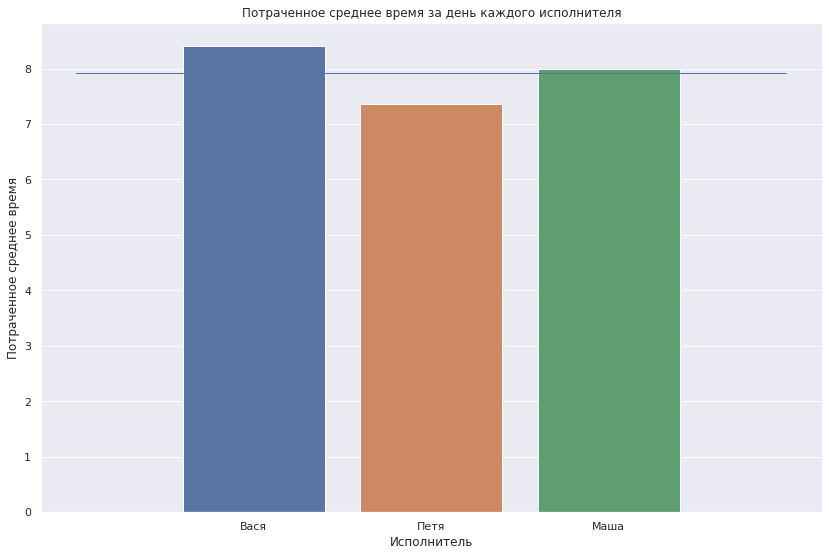

In [245]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Исполнитель", y='Среднее рабочее время', data=hourcost_by_man).set(title = 'Потраченное среднее время за день каждого исполнителя',ylabel='Потраченное среднее время')
plt.plot([-1, 3], [mean_average_hour, mean_average_hour], linewidth=1)

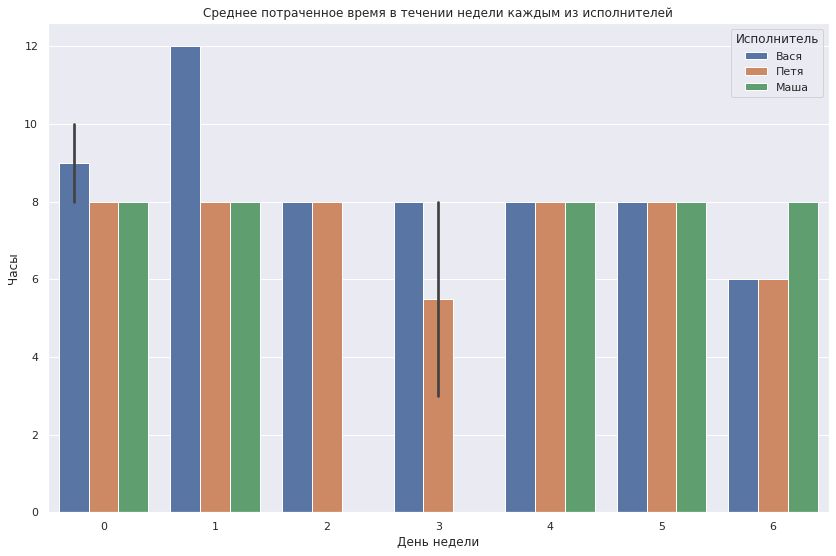

In [246]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="День недели", y='Часы', hue='Исполнитель', data=dates).set(title = 'Среднее потраченное время в течении недели каждым из исполнителей')

In [247]:
mean_overall_hour = hourcost_by_man['Часы'].mean()
mean_overall_hour

76.33333333333333

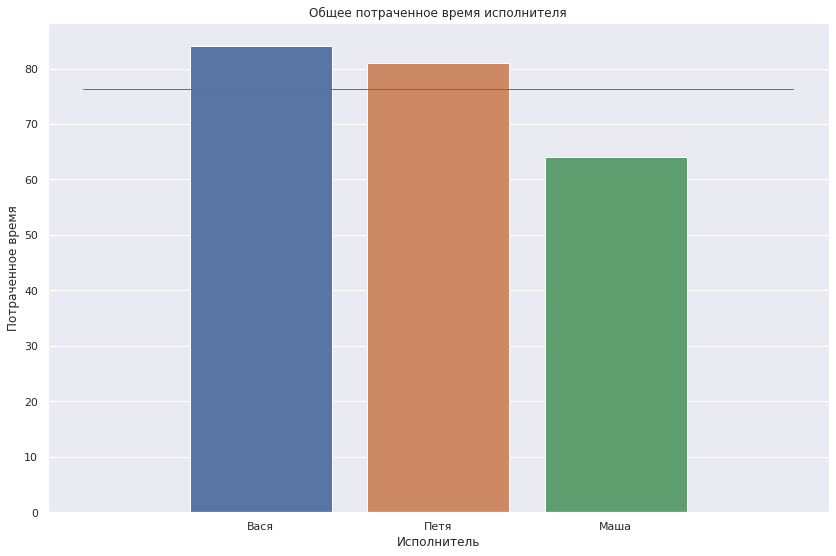

In [248]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Исполнитель", y='Часы', data=hourcost_by_man).set(title = 'Общее потраченное время исполнителя',ylabel='Потраченное время')
plt.plot([-1, 3], [mean_overall_hour, mean_overall_hour], linewidth=1)

## Вычислить дни отсутствия для каждого сотрудника, с учетом того, что все исполнители обязаны были работать каждый будний день

In [249]:
#Дни прогула сотрудников в будни
dates[(dates['Часы'] < 8) & (dates['День недели'] < 5)]

,Дата,Исполнитель,Часы,День недели
19,2021-08-05,Петя,3,3


Как я понял задачу "Вылет": найти отношение разности времени от оценки к оценке

## Рассчитать средний «вылет» специалиста из оценки в процентах

In [250]:
grade = data_a.drop(['Дата', 'Расход'],axis=1)
hours_list = []
for worker, task in zip(grade['Исполнитель'], grade['Задача']):
  hours = grade[(grade['Исполнитель'] == worker) & (grade['Задача'] == task)]['Часы']
  hours_list.append(hours.sum())
grade['Часы'] = hours_list

del hours_list
gc.collect()

grade = grade.drop_duplicates()
grade = grade.reset_index(drop=True)
grade = grade.merge(data_b, how = 'left', on=['Задача','Задача'])
grade['Средний вылет'] = (grade['Часы'] - grade['Оценка'])/grade['Оценка'] *100
grade

,Исполнитель,Задача,Часы,Оценка,Средний вылет
0,Вася,LOC-1,8,6,33.333333
1,Петя,LOC-2,8,4,100.000000
2,Маша,LOC-3,2,2,0.000000
3,Маша,LOC-4,4,4,0.000000
4,Маша,LOC-5,4,4,0.000000
5,Маша,LOC-7,6,6,0.000000
6,Вася,LOC-8,4,4,0.000000
7,Петя,LOC-9,2,2,0.000000
8,Вася,LOC-10,4,3,33.333333
9,Петя,LOC-11,6,6,0.000000


In [251]:
mean_worker_grade_list = []
for worker in hourcost_by_man['Исполнитель']:
  grades = grade[grade['Исполнитель'] == worker]['Средний вылет']
  mean_worker_grade_list.append(grades.sum()/len(grades))
hourcost_by_man['Средний вылет работника'] = mean_worker_grade_list

del mean_worker_grade_list
gc.collect()

hourcost_by_man

,Исполнитель,Часы,Ставка,Зарплата,Среднее рабочее время,Средний вылет работника
0,Вася,84.0,50,4200.0,8.400000,26.190476
1,Петя,81.0,35,2835.0,7.363636,32.142857
2,Маша,64.0,75,4800.0,8.000000,62.962963


In [252]:
mean_average_grade = hourcost_by_man['Средний вылет работника'].mean()
mean_average_grade

40.432098765432094

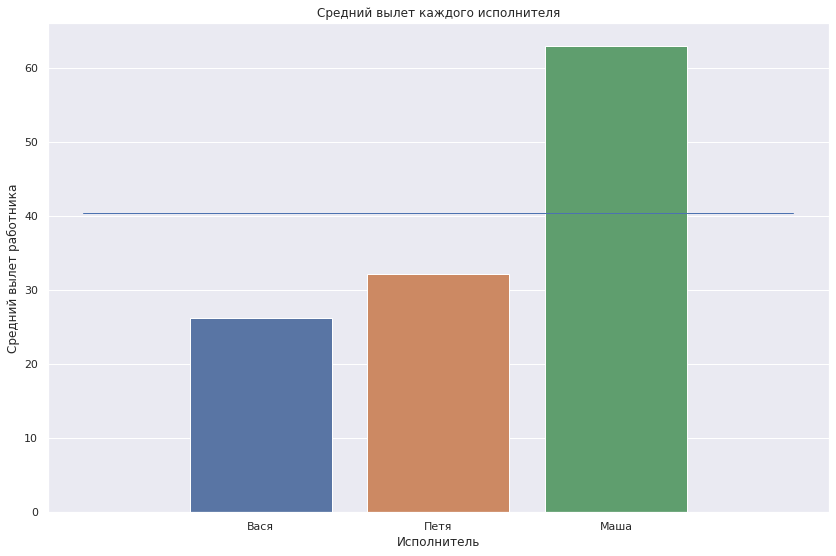

In [253]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Исполнитель", y='Средний вылет работника', data=hourcost_by_man).set(title = 'Средний вылет каждого исполнителя')
plt.plot([-1, 3], [mean_average_grade, mean_average_grade], linewidth=1)

30

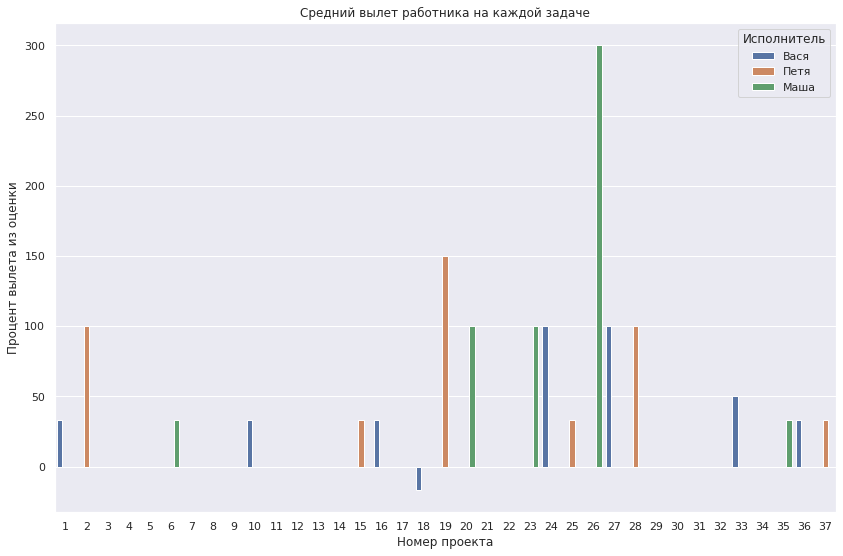

In [254]:
a4_dims = (14, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)

quality = grade.copy()
quality['Задача'] = quality['Задача'].apply(getNum)
g = sns.barplot(x="Задача", y='Средний вылет', hue='Исполнитель', data=quality).set(title = 'Средний вылет работника на каждой задаче',xlabel='Номер проекта', ylabel='Процент вылета из оценки')

del quality
gc.collect()

Вывод по исполнителям: Вася - любит перерабатывать, сидеть до 12 часов работы, иногда успевает быстрее, чем в срок; Маша - неэффективна, не берет много задач, пропускает дедлайны; Петя - склонен к прогулу.

## Дополнительно необходимо сформировать сводный график по проекту

In [255]:
projects = projects.merge(data_b, on=['Задача', 'Задача'], how='left')

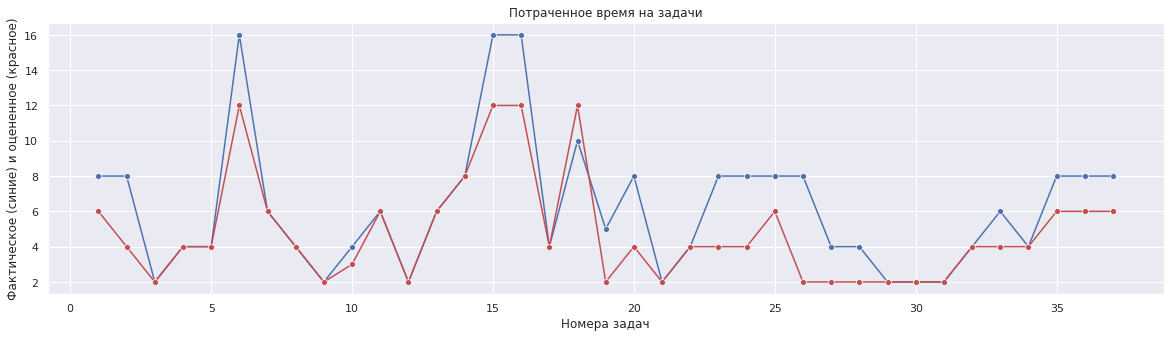

In [256]:
timecost = projects.copy()
timecost['Задача'] = timecost['Задача'].apply(getNum)
g = sns.lineplot(x="Задача", y='Часы', data=timecost, marker='o', color='b')
g = sns.lineplot(x="Задача", y='Оценка', data=timecost, marker='o', color='r')
g.set(title = 'Потраченное время на задачи',xlabel='Номера задач', ylabel='Фактическое (синие) и оцененное (красное)')
sns.set(rc={'figure.figsize':(20, 5)})
g.figure.savefig('hourcost.png')

In [257]:
print("Всего потрачено на проект", data_a['Часы'].sum(), "человеко-часов")

Всего потрачено на проект 229 человеко-часов
